In [1]:
import pandas as pd
import os
from obspy.core import UTCDateTime
from obspy import read, Stream
from dsar import DSAR
from rsam import RSAM
from utilities import get_combined_csv

In [2]:
current_dir: str = os.getcwd()

output_directory: str = os.path.join(current_dir, "output", "indonesia")
os.makedirs(output_directory, exist_ok=True)

# Get DSAR output directory and make sure it exists
dsar_directory: str = os.path.join(output_directory, "dsar")
os.makedirs(dsar_directory, exist_ok=True)

rsam_directory: str = os.path.join(output_directory, "rsam")
os.makedirs(rsam_directory, exist_ok=True)

In [3]:
stations = ['VG.RUA3.00.EHZ']

idds_dir = 'D:\\Data\\MSEED'

# start_date: str = "2024-04-12"
# end_date: str = "2024-04-14"
start_date: str = "2023-01-01"
end_date: str = "2024-04-15"

resample_rule = '10min'


In [4]:
def get_dates(start: str, end: str) -> pd.DatetimeIndex:
    return pd.date_range(start, end, freq="D")

In [5]:
dates: list[UTCDateTime] = [UTCDateTime(date) for date in get_dates(start_date, end_date)]


In [6]:
def get_stream(idds_dir, station: str, date: UTCDateTime) -> Stream:
    net, sta, loc, chan = station.split('.')
    year = date.strftime("%Y")
    jul_date = date.strftime("%j")
    directory = os.path.join(idds_dir, year, net, sta, '*', jul_date, '*')
    
    stream = Stream()
    
    try:
        stream = read(directory)
        stream.merge(fill_value=0)
    except Exception as e:
        print(f'⛔ {date} :: {e}')
    finally:
        return stream
    

In [7]:
# dsar_bands: dict[str, list[float]] = {
#     'HF' : [0.1, 8.0, 16.0],
#     'LF' : [0.1, 4.5, 8.0],
# }
# 
# rsam_bands: dict[str, list[float]] = {
#     'VLP': [0.02, 0.2],
#     'LP': [0.5, 4.0],
#     'VT': [4.0, 18.0]
# }
# 
# streams: dict[str, Stream] = {}
# series: dict[str, dict[str, pd.Series]] = {}
# 
# for station in stations:   
#     csv_files: dict[str, list[str]] = {}
# 
#     for date in dates:
#         date_str = date.strftime("%Y-%m-%d")
#         jul_date = date.strftime("%j")
#         print(f'📅 :: {jul_date} - {date_str}')
# 
#         streams[date_str] = get_stream(idds_dir, station, date)
# 
#         if streams[date_str].count():
#             dsar = DSAR(streams[date_str], bands = dsar_bands, resample = resample_rule)
#             dsar.save(output_directory = dsar_directory)
# 
#             rsam = RSAM(streams[date_str], resample = resample_rule, bands = rsam_bands)
#             rsam.save(output_directory = rsam_directory)
# 
# 
#     DSAR.concatenate_csv(dsar_directory, station, resample=resample_rule)
#     RSAM.concatenate_csv(rsam_directory, station, resample=resample_rule)


In [8]:
continuous_eruptions: list[list[str]] = [
    # ['2017-11-21', '2017-11-29'],
    # ['2018-06-27', '2018-07-16'],
    # ['2018-07-24', '2018-07-27'],
    ['2024-04-14', '2024-04-15'],
]

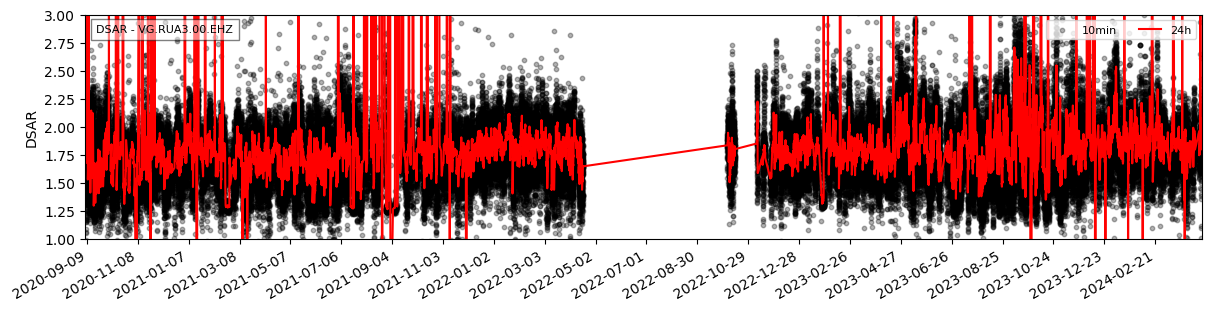

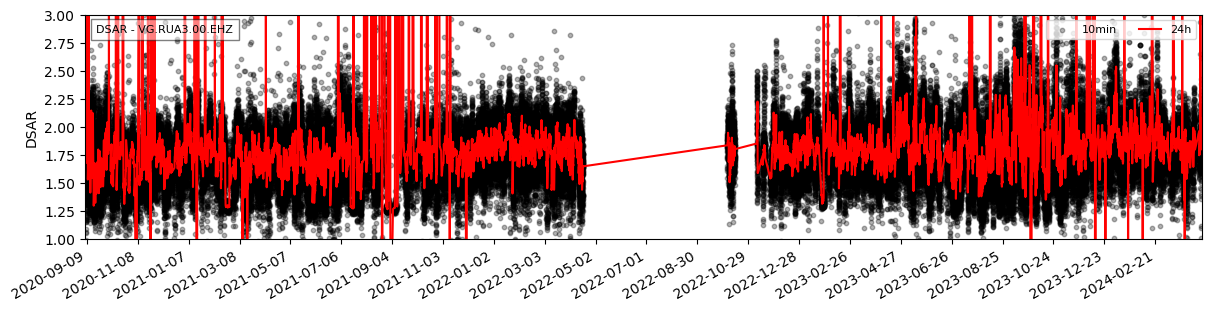

In [9]:
DSAR.plot_single_graph(dsar_directory, stations[0], resample=resample_rule,
          y_min = 1.0, y_max = 3, interval_day=60)

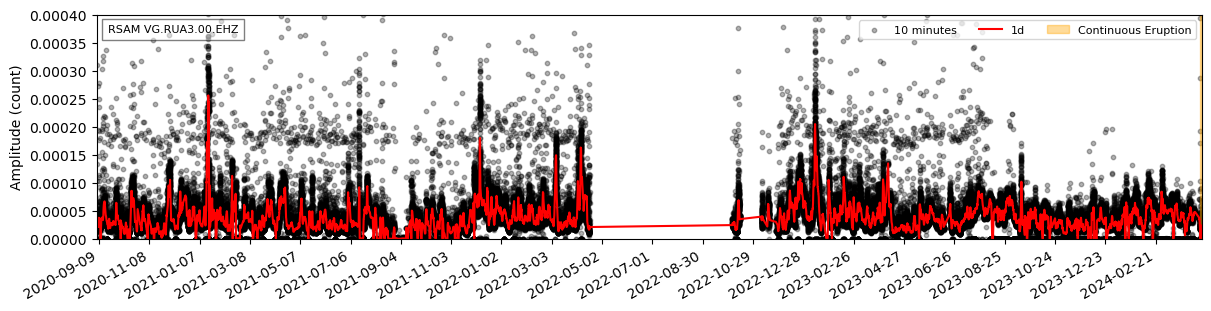

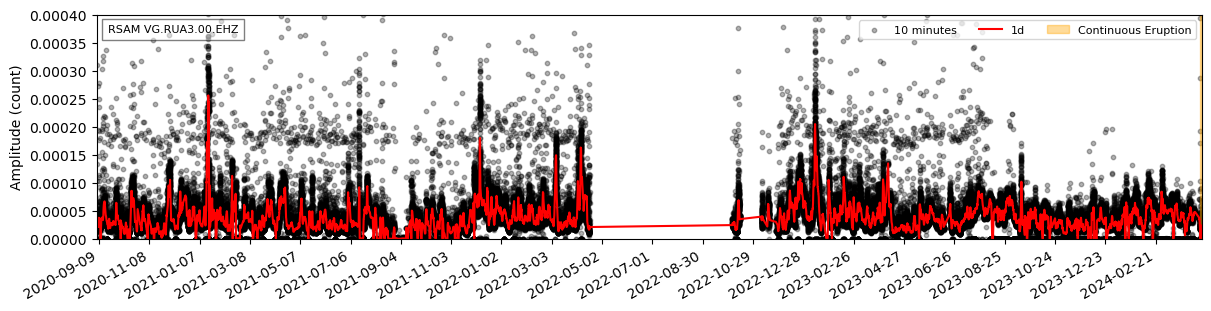

In [10]:
RSAM.plot_single_graph(rsam_directory, stations[0], resample=resample_rule, interval_day=60, axvspans = continuous_eruptions)